# Aula 05 - Pipelines - Exercício

## Exercício 1

Quando estamos trabalhando com modelos, é muito comum que façamos o treinamento em um ambiente, mas precisamos executar o modelo em outro! O objetivo desse exercício é simular esse ambiente.

Suponha que uma área de uma concessionária de veículos deseja captar potenciais clientes. Para isso, os analistas da área farão contato com cada cliente potencial. A área considera que clientes potenciais são aqueles que ganham mais de $50K por ano.  

Por ser inviável o contato com todos os clientes, a empresa contratou dados com um fornecedor e deseja utilizá-los para priorizar o contato, focando em clientes com alta probabilidade de atenderem o requisito desejado.  

Refaça o exercício da aula 04 utilizando a Pipeline do sklearn. Salve o modelo treinado na pasta "Modelo Renda", onde se encontra o notebook para se fazer a inferência.  

In [1]:
import pandas as pd

In [3]:
adult_dataset = pd.read_csv('adult.csv')

print(adult_dataset.shape)

adult_dataset.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Eliminando dados faltantes

adult_dataset = adult_dataset.dropna()

print(adult_dataset.shape)

adult_dataset.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Separando o Dataset em Dataframes de Treino e Teste

import numpy as np

adult_dataset['split'] = np.random.randn(adult_dataset.shape[0], 1)

msk = np.random.rand(len(adult_dataset)) <= 0.5

df_adult_train = adult_dataset[msk]
df_adult_test = adult_dataset[~msk]

df_adult_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,split
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,-0.777192
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,-0.212225
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,-1.475476
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0.434304
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K,-2.266731


In [6]:
df_adult_train = df_adult_train.drop(['split'], axis=1)
df_adult_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [7]:
df_adult_test = df_adult_test.drop(['split'], axis=1)
df_adult_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
12,26,Private,82091,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,<=50K


In [8]:
df_adult_train['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
df_adult_train['income'] = df_adult_train['income'].map({'<=50K': 0, '>50K': 1})

df_adult_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0


In [10]:
categ_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
num_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [11]:
X = df_adult_train[categ_features + num_features]
y = df_adult_train['income']

print(X.shape, y.shape)

(24577, 12) (24577,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(17203, 12) (17203,)
(7374, 12) (7374,)


In [15]:
from sklearn.preprocessing import OrdinalEncoder
pd.options.mode.chained_assignment = None

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

oe.fit(X_train[categ_features])

X_train[categ_features] = oe.transform(X_train[categ_features])

X_valid[categ_features] = oe.transform(X_valid[categ_features])

X_train.head()

,workclass,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
25768,4.0,2.0,7.0,0.0,4.0,1.0,38.0,62,13,0,0,40
19646,4.0,2.0,4.0,0.0,4.0,1.0,38.0,51,13,0,0,40
30457,4.0,2.0,7.0,0.0,4.0,1.0,38.0,29,9,0,0,50
19557,2.0,4.0,10.0,1.0,4.0,0.0,38.0,34,14,0,0,50
4387,4.0,4.0,8.0,2.0,4.0,0.0,38.0,19,6,34095,0,24


In [16]:
from lightgbm import LGBMClassifier

In [17]:
modelo = LGBMClassifier(n_estimators=50, max_depth=7, learning_rate=0.1, is_unbalance=True, importance_type='gain')

modelo

LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50)

In [18]:
# Treino do modelo

modelo.fit(X_train, y_train)

LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50)

In [19]:
y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(17203,) (7374,)


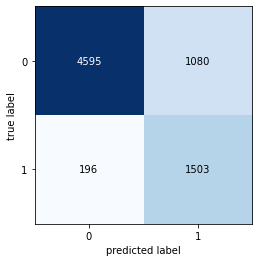

In [20]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.83, Precision: 0.60, Recall: 0.90
Validação:
Acc: 0.83, Precision: 0.58, Recall: 0.88


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from lightgbm import LGBMClassifier
pd.options.mode.chained_assignment = None

def transform_education(df):
    
    df = df.copy()
    
    df['educational-num'] = df['educational-num'].apply(lambda x: 1 if x >= 10 else 0)
    
    return df
    
    
categorizer = ColumnTransformer(transformers = [
    ('transf_categ', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categ_features),
    ('numeric', 'passthrough', num_features),   
    ('education', FunctionTransformer(transform_education), ['educational-num'])   
])


pipe = Pipeline(steps = [
    ('categ', categorizer),
    ('modelo', LGBMClassifier(is_unbalance=True, learning_rate=0.1, max_depth=7, n_estimators=150, importance_type='gain')),
])